In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import warnings
from sklearn.metrics import r2_score,mean_squared_error


warnings.filterwarnings("ignore")

applications = pd.read_csv("https://raw.githubusercontent.com/LeeMorinUCF/QMB6358F23/refs/heads/main/final_exam_2021/applications.csv")
print(applications.describe())
print(applications.dtypes)
print(applications.nunique())
print(applications.isnull().sum())
print(applications.duplicated().sum())


              app_id           ssn      zip_code         income     purchases  \
count     500.000000  5.000000e+02    500.000000     500.000000    500.000000   
mean   560031.296000  5.505287e+08  57925.572000   59546.000000  11080.202768   
std    262395.222907  2.662935e+08  25879.952552   24376.059332   8323.582408   
min    102227.000000  1.000911e+08  10654.000000       0.000000    299.996535   
25%    331219.500000  3.144437e+08  35886.750000   43000.000000   4536.388287   
50%    567079.500000  5.598348e+08  59040.000000   59500.000000   8883.661361   
75%    788718.500000  7.771024e+08  80699.250000   78000.000000  14890.652652   
max    998685.000000  9.990927e+08  99977.000000  123000.000000  39841.473607   

       credit_limit  
count    500.000000  
mean   20801.200000  
std    10374.396115  
min      300.000000  
25%    12400.000000  
50%    19400.000000  
75%    29750.000000  
max    41300.000000  
app_id             int64
ssn                int64
zip_code           int

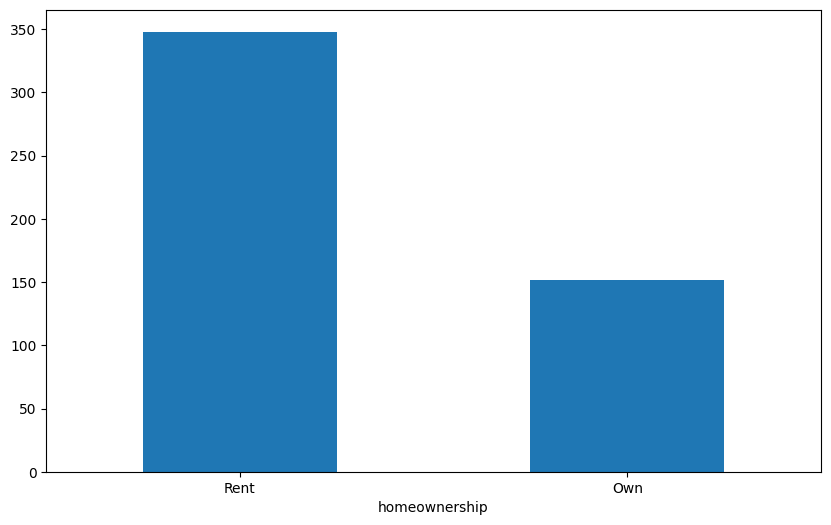

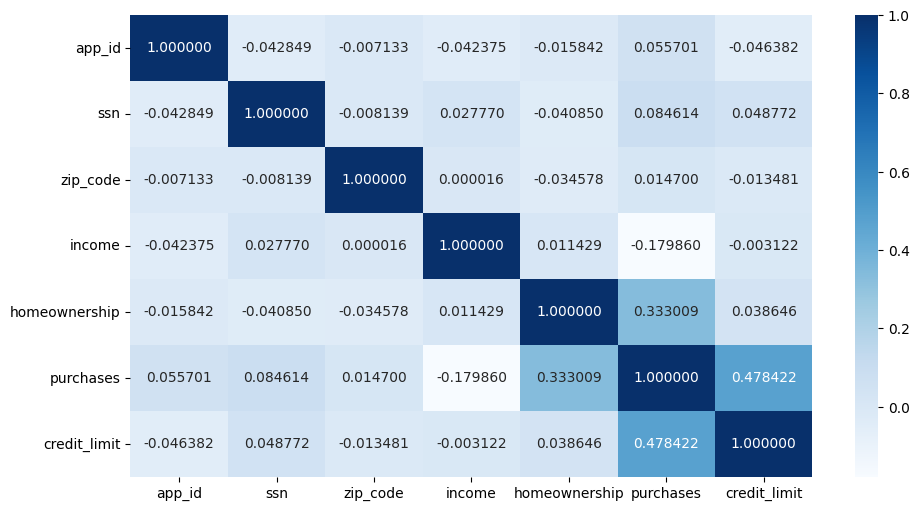

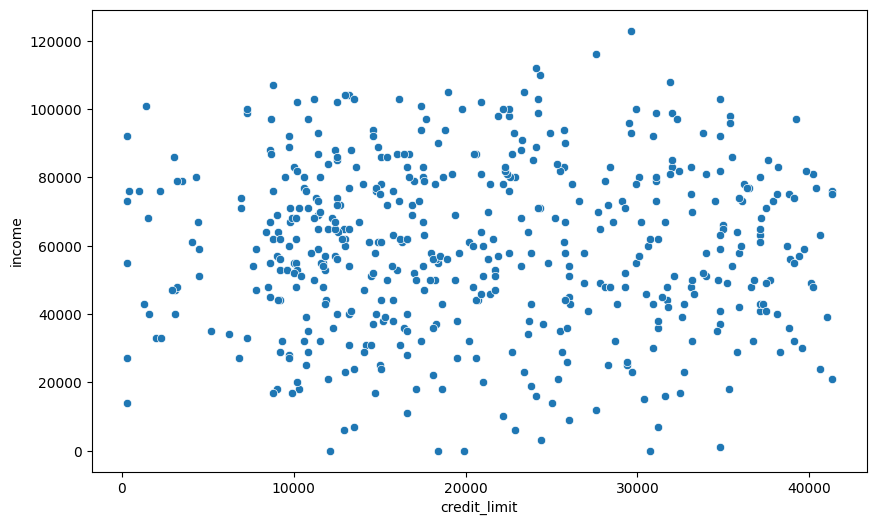

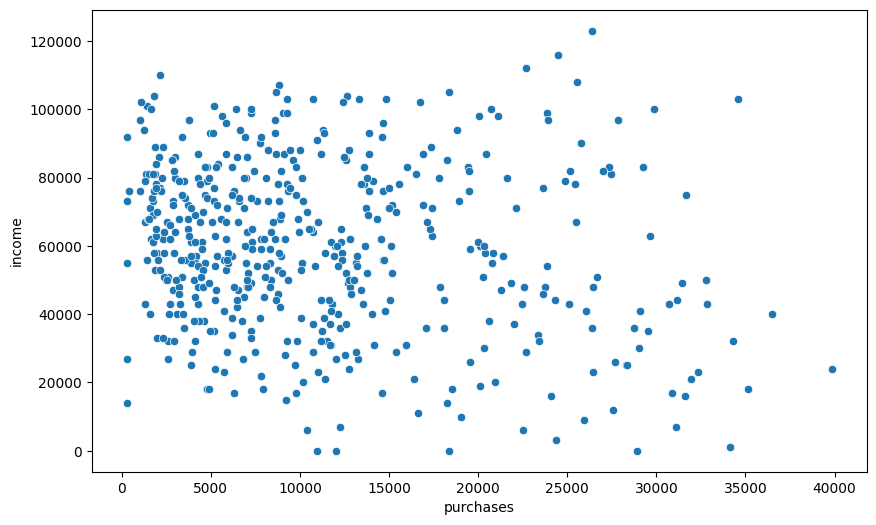

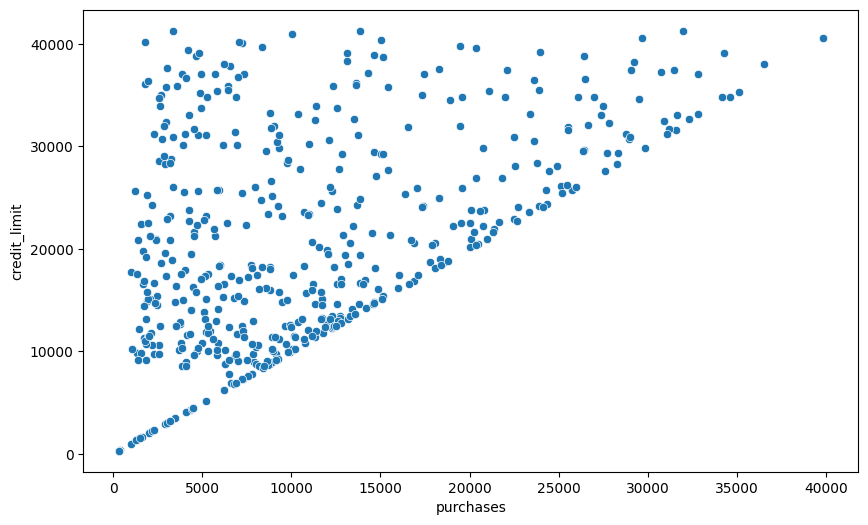

In [2]:
plt.figure(figsize=(10,6))
applications['homeownership'].value_counts().plot(kind='bar',rot=0)
plt.show()

applications['homeownership'] = [1 if X == "Own" else 0 for X in applications['homeownership']]

plt.figure(figsize=(11,6))
sns.heatmap(applications.corr(), fmt='f',annot=True,cmap="Blues")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='credit_limit',y='income',data=applications)
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x='purchases',y='income',data=applications)
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='purchases',y='credit_limit',data=applications)
plt.show()

In [3]:
X = applications.drop(['app_id','zip_code','purchases','ssn'],axis=1)
y = applications['purchases']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "LinearRegression":LinearRegression(),
    "lasso":Lasso(),
    "ridge":Ridge(),
    "RandomForestRegressor":RandomForestRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor()
    }



def evaluate_models(X_train_scaled,X_test_scaled,y_train,y_test,model):
    model = model.fit(X_train_scaled,y_train)
    pred= model.predict(X_test_scaled)
    r2 = r2_score(y_test,pred)
    mse = mean_squared_error(y_test, pred)
    print(f'{model.__class__.__name__}; --R2 Score-- {r2*100:.2f}; --MSE-- {mse}')
    return pred

for model_name,model in models.items():
    pred = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, model)
    print(f'results: {model_name}')
    pred = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, model)



LinearRegression; --R2 Score-- 40.80; --MSE-- 51015368.9579731
results: LinearRegression
LinearRegression; --R2 Score-- 40.80; --MSE-- 51015368.9579731
Lasso; --R2 Score-- 40.79; --MSE-- 51020785.619735725
results: lasso
Lasso; --R2 Score-- 40.79; --MSE-- 51020785.619735725
Ridge; --R2 Score-- 40.75; --MSE-- 51052952.42006039
results: ridge
Ridge; --R2 Score-- 40.75; --MSE-- 51052952.42006039
RandomForestRegressor; --R2 Score-- 52.84; --MSE-- 40637243.98901532
results: RandomForestRegressor
RandomForestRegressor; --R2 Score-- 52.04; --MSE-- 41324367.35795817
DecisionTreeRegressor; --R2 Score-- 25.40; --MSE-- 64279135.48430078
results: DecisionTreeRegressor
DecisionTreeRegressor; --R2 Score-- 23.90; --MSE-- 65579098.01348847


In [4]:
poly_x = PolynomialFeatures(degree=3)
X_train_poly = poly_x.fit_transform(X_train)
X_test_poly = poly_x.fit_transform(X_test)


for model_name,model in models.items():
    pred = evaluate_models(X_train_poly, X_test_poly, y_train, y_test, model)
    print(f'results using polynomial features: {model_name}')


LinearRegression; --R2 Score-- 59.85; --MSE-- 34599677.30762538
results using polynomial features: LinearRegression
Lasso; --R2 Score-- 60.65; --MSE-- 33906044.73892707
results using polynomial features: lasso
Ridge; --R2 Score-- 60.26; --MSE-- 34243307.791821286
results using polynomial features: ridge
RandomForestRegressor; --R2 Score-- 52.89; --MSE-- 40598221.25551295
results using polynomial features: RandomForestRegressor
DecisionTreeRegressor; --R2 Score-- 29.83; --MSE-- 60469105.34011823
results using polynomial features: DecisionTreeRegressor


ssn               0
zip_code          0
fico              0
num_late          0
past_def          0
num_bankruptcy    0
dtype: int64
0
ssn               int64
zip_code          int64
fico              int64
num_late          int64
past_def          int64
num_bankruptcy    int64
dtype: object
ssn               3000
zip_code          3000
fico               485
num_late             6
past_def             6
num_bankruptcy       4
dtype: int64


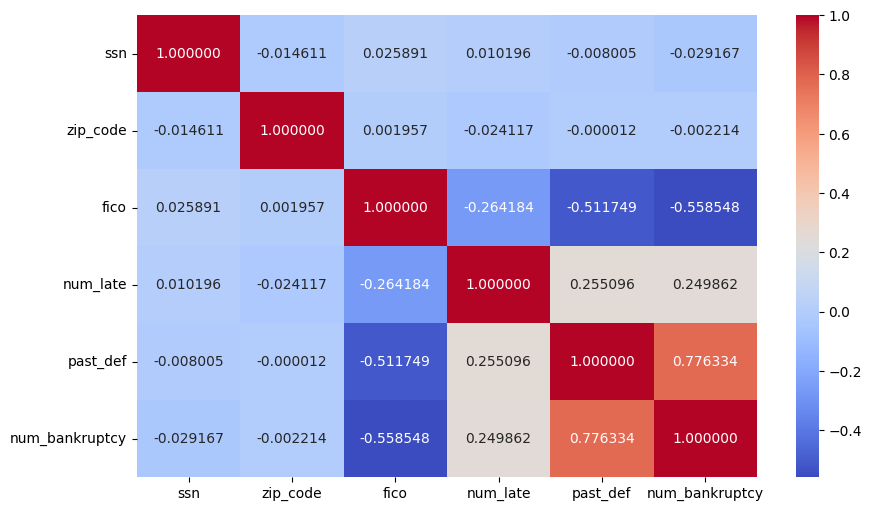

In [5]:
credit = pd.read_csv("https://raw.githubusercontent.com/LeeMorinUCF/QMB6358F23/refs/heads/main/final_exam_2021/credit_bureau.csv")

print(credit.isnull().sum())
print(credit.duplicated().sum())
print(credit.dtypes)
print(credit.nunique())

plt.figure(figsize=(10,6))
sns.heatmap(credit.corr(), fmt='f',annot=True,cmap="coolwarm")
plt.show()

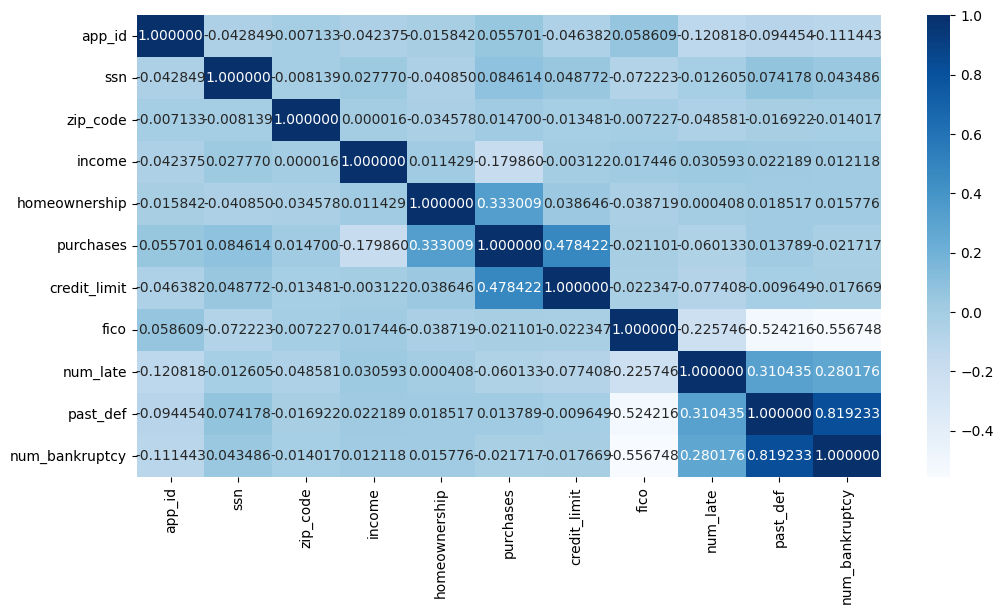

In [6]:
purch_app_bureau = pd.concat([applications,credit],join='inner',axis=1)
purch_app_bureau = purch_app_bureau.loc[:,~purch_app_bureau.columns.duplicated()].copy()
purch_app_bureau.isnull().sum()
purch_app_bureau.duplicated().sum()
purch_app_bureau.dtypes

plt.figure(figsize=(12,6))
sns.heatmap(purch_app_bureau.corr(),fmt='f',cmap="Blues",annot=True)
plt.show()

In [7]:
X = purch_app_bureau.drop(['app_id','ssn','zip_code','purchases'],axis=1)
y = purch_app_bureau['purchases']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for model_name, model in models.items():
    pred = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, model)
    print("Results from Purch App models: {model_name}")

LinearRegression; --R2 Score-- 40.60; --MSE-- 51182487.83402965
Results from Purch App models: {model_name}
Lasso; --R2 Score-- 40.60; --MSE-- 51184242.46307011
Results from Purch App models: {model_name}
Ridge; --R2 Score-- 40.56; --MSE-- 51216870.27493909
Results from Purch App models: {model_name}
RandomForestRegressor; --R2 Score-- 52.09; --MSE-- 41286554.49384523
Results from Purch App models: {model_name}
DecisionTreeRegressor; --R2 Score-- 24.54; --MSE-- 65024206.62765298
Results from Purch App models: {model_name}


In [8]:
poly_x = PolynomialFeatures(degree=3)
X_train_poly = poly_x.fit_transform(X_train)
X_test_poly = poly_x.fit_transform(X_test)

    

for model_name,model in models.items():
    print(f'results using polynomial features for purch_app: {model_name}')
    pred = evaluate_models(X_train_poly, X_test_poly, y_train, y_test, model)



results using polynomial features for purch_app: LinearRegression
LinearRegression; --R2 Score-- 42.24; --MSE-- 49768434.69865699
results using polynomial features for purch_app: lasso
Lasso; --R2 Score-- 29.93; --MSE-- 60382686.71136755
results using polynomial features for purch_app: ridge
Ridge; --R2 Score-- 46.57; --MSE-- 46042875.91549972
results using polynomial features for purch_app: RandomForestRegressor
RandomForestRegressor; --R2 Score-- 51.32; --MSE-- 41944798.02753247
results using polynomial features for purch_app: DecisionTreeRegressor
DecisionTreeRegressor; --R2 Score-- 35.24; --MSE-- 55800591.02608629


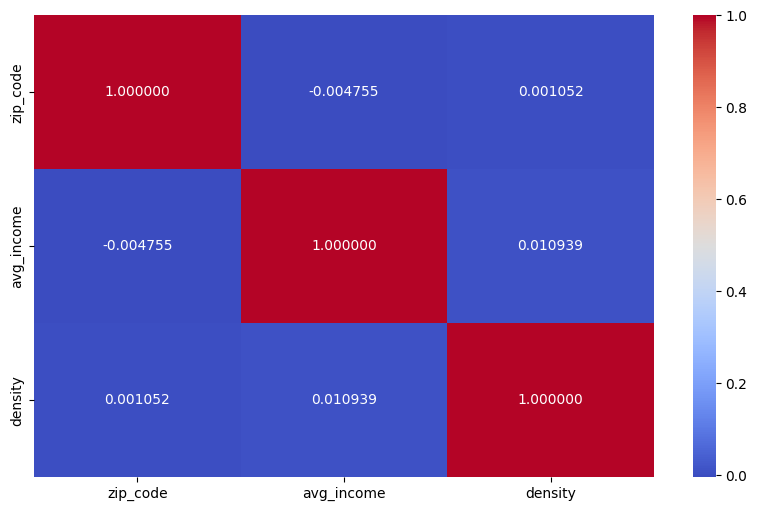

In [9]:
demographic = pd.read_csv("https://raw.githubusercontent.com/LeeMorinUCF/QMB6358F23/refs/heads/main/final_exam_2021/demographic.csv")

demographic.describe()
demographic.isnull().sum()
demographic.dtypes
demographic.nunique()
demographic.duplicated().sum()


plt.figure(figsize=(10,6))
sns.heatmap(demographic.corr(), fmt='f',annot=True,cmap='coolwarm')
plt.show()

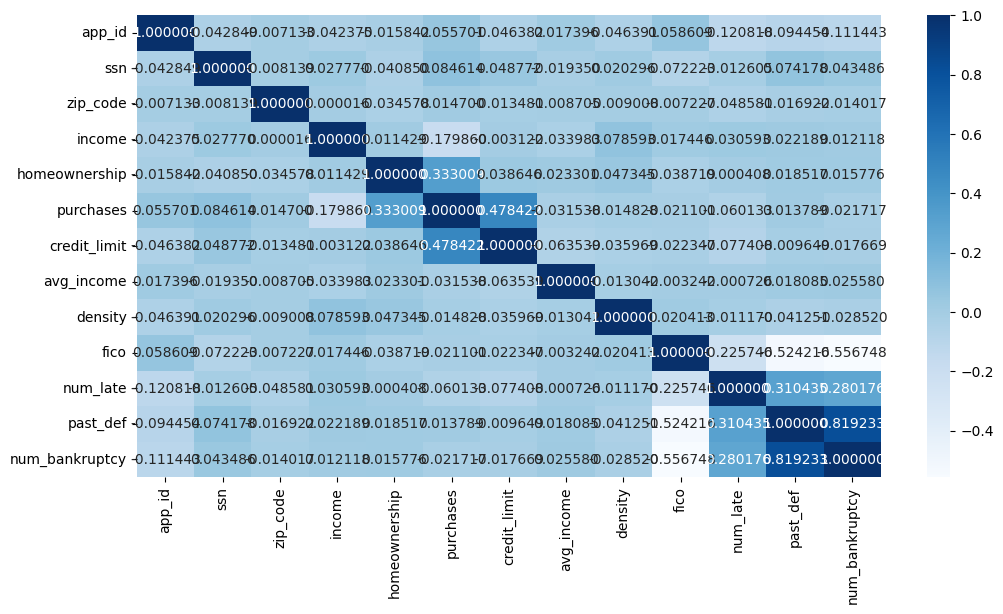

In [10]:
purchase_full = pd.concat([applications,demographic,credit],join='inner',axis=1)
purchase_full = purchase_full.loc[:,~purchase_full.columns.duplicated()].copy()
purchase_full.isnull().sum()
purchase_full.duplicated().sum()
purchase_full.describe()
purchase_full.dtypes

plt.figure(figsize=(12,6))
sns.heatmap(purchase_full.corr(),fmt='f',annot=True,cmap="Blues")
plt.show()

In [11]:
X = purchase_full.drop(['app_id','ssn','zip_code','purchases'],axis=1)
y = purchase_full['purchases']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




for model_name,model in models.items():
    pred = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, model)
    print(f'results from purchase full: {model_name}')




LinearRegression; --R2 Score-- 39.73; --MSE-- 51934999.14934348
results from purchase full: LinearRegression
Lasso; --R2 Score-- 39.73; --MSE-- 51933470.004615985
results from purchase full: lasso
Ridge; --R2 Score-- 39.69; --MSE-- 51968529.43640982
results from purchase full: ridge
RandomForestRegressor; --R2 Score-- 55.38; --MSE-- 38450286.28207233
results from purchase full: RandomForestRegressor
DecisionTreeRegressor; --R2 Score-- 33.98; --MSE-- 56891404.65762779
results from purchase full: DecisionTreeRegressor


In [12]:
poly_x = PolynomialFeatures(degree=3)
X_train_poly = poly_x.fit_transform(X_train)
X_test_poly = poly_x.fit_transform(X_test)

    

for model_name,model in models.items():
    print(f'results from polynomial features for purchase full: {model_name}')
    pred = evaluate_models(X_train_poly, X_test_poly, y_train, y_test, model)


results from polynomial features for purchase full: LinearRegression
LinearRegression; --R2 Score-- -92.22; --MSE-- 165639235.59393287
results from polynomial features for purchase full: lasso
Lasso; --R2 Score-- -1.16; --MSE-- 87167640.22126547
results from polynomial features for purchase full: ridge
Ridge; --R2 Score-- -1716.00; --MSE-- 1564836467.9128509
results from polynomial features for purchase full: RandomForestRegressor
RandomForestRegressor; --R2 Score-- 52.85; --MSE-- 40627830.41884631
results from polynomial features for purchase full: DecisionTreeRegressor
DecisionTreeRegressor; --R2 Score-- 15.12; --MSE-- 73140411.26864193


In [13]:
utilization = purchase_full['purchases'] / purchase_full['credit_limit']


utilization.describe
max_utils = np.max(utilization)
min_utils = np.min(utilization)
print('Maxium Utils\n')
print(max_utils)
print('minimum utils')
print(min_utils)

X = purch_app_bureau.drop(['app_id','ssn','zip_code'],axis=1)
y=  utilization

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



for model_name,model in models.items():
    pred = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, model)
    print(f'results from utility model: {model_name}')

Maxium Utils

0.9999999984305333
minimum utils
0.04416729614362861
LinearRegression; --R2 Score-- 82.51; --MSE-- 0.017545272266832408
results from utility model: LinearRegression
Lasso; --R2 Score-- -8.15; --MSE-- 0.10851730643958528
results from utility model: lasso
Ridge; --R2 Score-- 82.51; --MSE-- 0.017553841362719882
results from utility model: ridge
RandomForestRegressor; --R2 Score-- 98.43; --MSE-- 0.0015764073824886778
results from utility model: RandomForestRegressor
DecisionTreeRegressor; --R2 Score-- 95.44; --MSE-- 0.00457259587340154
results from utility model: DecisionTreeRegressor


In [14]:
poly_x = PolynomialFeatures(degree=3)
X_train_poly = poly_x.fit_transform(X_train)
X_test_poly = poly_x.fit_transform(X_test)

    

for model_name,model in models.items():
    print(f'results for utilization: {model_name}')
    pred = evaluate_models(X_train_poly, X_test_poly, y_train, y_test, model)



results for utilization: LinearRegression
LinearRegression; --R2 Score-- 99.15; --MSE-- 0.0008504896281541898
results for utilization: lasso
Lasso; --R2 Score-- 96.39; --MSE-- 0.0036239859474661074
results for utilization: ridge
Ridge; --R2 Score-- 98.07; --MSE-- 0.0019391294039975359
results for utilization: RandomForestRegressor
RandomForestRegressor; --R2 Score-- 97.16; --MSE-- 0.0028516421921006368
results for utilization: DecisionTreeRegressor
DecisionTreeRegressor; --R2 Score-- 91.51; --MSE-- 0.008523593326735602


In [15]:
log_odds_utils = abs(np.log(utilization)) / (1-(utilization))

log_odds_utils.describe()

X = purch_app_bureau.drop(['app_id','ssn','zip_code'],axis=1)
y = log_odds_utils

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


for model_name,model in models.items():
    pred = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, model)
    print(f'results from log odds utils: {model_name}')

LinearRegression; --R2 Score-- 78.34; --MSE-- 0.05508166039365585
results from log odds utils: LinearRegression
Lasso; --R2 Score-- -6.07; --MSE-- 0.26970653293346475
results from log odds utils: lasso
Ridge; --R2 Score-- 78.36; --MSE-- 0.05502327341580166
results from log odds utils: ridge
RandomForestRegressor; --R2 Score-- 99.16; --MSE-- 0.0021479696783967064
results from log odds utils: RandomForestRegressor
DecisionTreeRegressor; --R2 Score-- 97.38; --MSE-- 0.006656004912083284
results from log odds utils: DecisionTreeRegressor


In [26]:
lr_params = {
    "copy_X": [True, False],
    "fit_intercept": [True, False],
    "n_jobs": [-1, 1],
}

lr_model = GridSearchCV(LinearRegression(), param_grid=lr_params,scoring='neg_mean_squared_error',cv=10).fit(X_train_poly,y_train)
print(lr_model.best_estimator_)
print(lr_model.best_params_)
print(lr_model.best_score_)
lr = LinearRegression(copy_X=True,fit_intercept=True,n_jobs=-1).fit(X_train_poly,y_train)
lr_pred = lr.predict(X_test_poly)
print('Best R2 Score For Linear Regression model')
print(r2_score(y_test, lr_pred))



lasso_params = {'alpha': (np.logspace(-8, 8, 100))}
lasso_model = GridSearchCV(Lasso(),lasso_params,cv=10,scoring='neg_mean_squared_error').fit(X_train_poly,y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

lasso = Lasso(0.006579332246575682).fit(X_train_poly,y_train)
lasso_pred = lasso.predict(X_test_poly)
r2_lasso = r2_score(y_test, lasso_pred)
print(f'r2 score for best lasso params: {r2_lasso*100:.2f}')


ridge_params = {'alpha': (np.logspace(-8, 8, 100))}
ridge_model = GridSearchCV(Ridge(977.0099572992286), ridge_params,scoring='neg_mean_squared_error').fit(X_train_poly,y_train)
ridge_model.best_params_
ridge = Ridge(alpha=).fit(X_train_poly,y_train)
ridge_pred = ridge.predict(X_test_poly)
print('best r2 score from ridge regressor')
print(r2_score(y_test, ridge_pred))

RandomForest_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
RandomForestModel = GridSearchCV(RandomForestRegressor(random_state=0),RandomForest_grid,cv=10,scoring='neg_mean_squared_error').fit(X_train_poly,y_train)
RandomForestModel.best_params_
randomforestregressor = RandomForestRegressor(max_depth=4,n_estimators=300).fit(X_train_poly,y_train)
rfr_pred = randomforestregressor.predict(X_test_poly)
print('R2 score for RandomForestRegressor')
print(r2_score(y_test, rfr_pred))


dt_param_grid = {
  'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
}
dt_model = GridSearchCV(DecisionTreeRegressor(),dt_param_grid,scoring='neg_mean_squared_error',cv=10).fit(X_train_poly,y_train)
dt_model.best_params_
DecisionTree = DecisionTreeRegressor(criterion='poisson',max_depth=11,max_features='log2',splitter='best').fit(X_train_poly,y_train)
dt_pred = DecisionTree.predict(X_test_poly)
print('r2 score for best DecisionTree model')
print(r2_score(y_test, dt_pred))

SyntaxError: invalid syntax (365511683.py, line 32)